# Módulo #1 - Estadística

**Fecha**: 0922

### 1) Exploratory Data Analysis - Base de Vinos 🍷

In [1]:
# Importando librerías
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
warnings.filterwarnings("ignore")

**Importando una base de datos**

In [3]:
# Descargando la base de datos
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Explorando la base de datos**

In [4]:
# Explorando características de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# Ejemplos de observaciones sin valor en 'fixed acidity'
df[df['fixed acidity'].isna()].head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
174,white,NaN,0.27,0.31,17.7,0.051,33.0,173.0,0.9990,3.09,0.64,10.2,5
249,white,NaN,0.41,0.14,10.4,0.037,18.0,119.0,0.9960,3.38,0.45,10.0,5


In [6]:
# Nos quedamos con observaciones con las métricas completas
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [7]:
# Valores únicos
print('valores únicos:', df['type'].unique())
print('valores únicos:', df['type'].nunique())

valores únicos: ['white' 'red']
valores únicos: 2


In [8]:
df.select_dtypes(include=np.number).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Descripción estadística**

In [9]:
# Descripción estadística de las variables numéricas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# Slicing dataframes con 'loc'
df.describe().loc['25%':'75%', ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
25%,6.4,0.23,0.25,1.8,0.038,17.0,77.0,0.99233,3.11,0.43,9.5,5.0
50%,7.0,0.29,0.31,3.0,0.047,29.0,118.0,0.99489,3.21,0.51,10.3,6.0
75%,7.7,0.40,0.39,8.1,0.065,41.0,156.0,0.99700,3.32,0.60,11.3,6.0


In [11]:
# Slicing dataframes con 'loc'
df.describe().iloc[4:-1,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
25%,6.4,0.23,0.25,1.8,0.038,17.0,77.0,0.99233,3.11,0.43,9.5,5.0
50%,7.0,0.29,0.31,3.0,0.047,29.0,118.0,0.99489,3.21,0.51,10.3,6.0
75%,7.7,0.40,0.39,8.1,0.065,41.0,156.0,0.99700,3.32,0.60,11.3,6.0


In [12]:
# Creando variables categóricas - Opción #1
df['rating'] = df['quality'].apply(lambda x: 'Bueno' if x >= 6 else 'Regular/Malo')
df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Bueno
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Bueno
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Bueno


In [13]:
# Creando variables categóricas - Opción #2
def rating_function(x):
    if x >=6:
        return 'Bueno'
    else:
        return 'Regular/Malo'

#(df['quality'].apply(rating_function) == df['rating']).sum()
df['quality'].apply(rating_function)

0              Bueno
1              Bueno
2              Bueno
3              Bueno
4              Bueno
            ...     
6491           Bueno
6492    Regular/Malo
6494           Bueno
6495    Regular/Malo
6496           Bueno
Name: quality, Length: 6463, dtype: object

In [52]:
# Estadísticos
print("Median: ", np.median(df["alcohol"]))
print("Standard Desv: ", round(np.std(df["alcohol"])),2)
print("Percentile X: ", np.percentile(df["alcohol"],50))
print("Moda: ", df['type'].mode()[0])

Median:  10.3
Standard Desv:  1 2
Percentile X:  10.3
Moda:  white


**Conteos e índices**

In [15]:
# Cuántos tipos de vinos hay?
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [16]:
# Conteos Totales
conteos_v = pd.DataFrame(df['type'].value_counts())
conteos_v.columns = ['conteos']
conteos_v['%'] = round((conteos_v['conteos']/conteos_v['conteos'].sum())*100,2)
#conteos_v.loc[len(conteos_v.index)] = ['Total', conteos_v['conteos'].sum(),conteos_v['%'].sum()] 
conteos_v

,conteos,%
white,4870,75.35
red,1593,24.65


In [17]:
# Conteos de vinos de buena calidad
conteos_v_2 = pd.DataFrame(df[df['quality']>=7]['type'].value_counts())
conteos_v_2.columns = ['conteos']
conteos_v_2['%'] = round((conteos_v_2['conteos']/conteos_v_2['conteos'].sum())*100,2)
conteos_v_2['Index vs Total'] = round((conteos_v_2['%']/conteos_v['%'])*100,2)
conteos_v_2

,conteos,%,Index vs Total
white,1054,82.93,110.06
red,217,17.07,69.25


In [18]:
# Poniendole color al dataframe
def color_index(val):
    if val > 110:
        color = 'green'
    
    elif val < 90:
        color = 'red'
    
    else:
        color = ''
    return 'background: %s' % color
 
conteos_v_2.style.applymap(color_index, subset=['Index vs Total'])

,conteos,%,Index vs Total
white,1054,82.930000,110.060000
red,217,17.070000,69.250000


**Histogramas y Distribuciones**

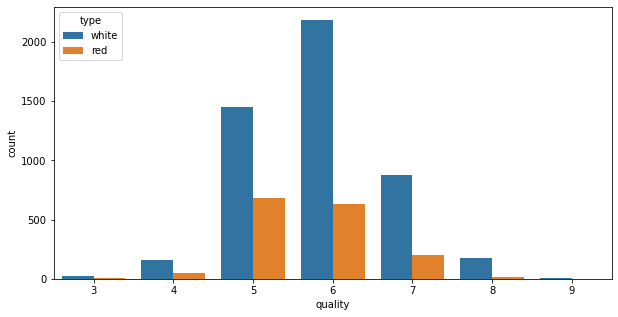

In [19]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x = df.quality, data=df, hue='type')
plt.show()

array([[<AxesSubplot:title={'center':'pH'}>]], dtype=object)

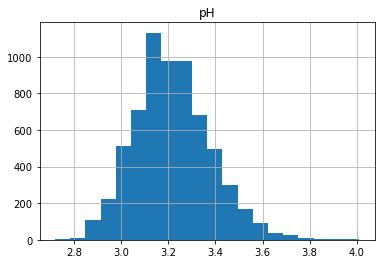

In [20]:
# Histograma del pH (matplotlib)
df.hist(column='pH', bins=20)

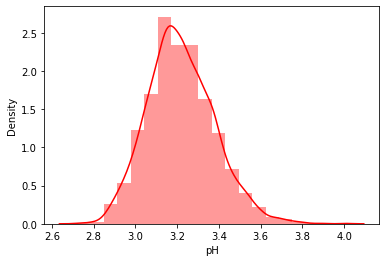

In [21]:
# Distribución del pH (seaborn)
sns.distplot(df.pH, bins=20, kde=True, color="red")
plt.show()

**Box plots**

0.25    3.11
0.75    3.32
Name: pH, dtype: float64


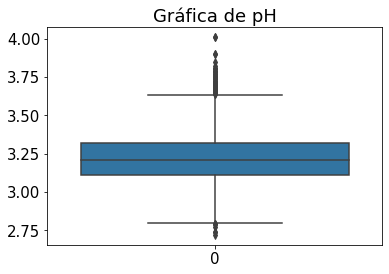

In [29]:
# Boxplot de Alcohol
print(df["pH"].quantile(([0.25, 0.75])))
sns.boxplot(data=df['pH'])
plt.title('Gráfica de pH')
plt.show()

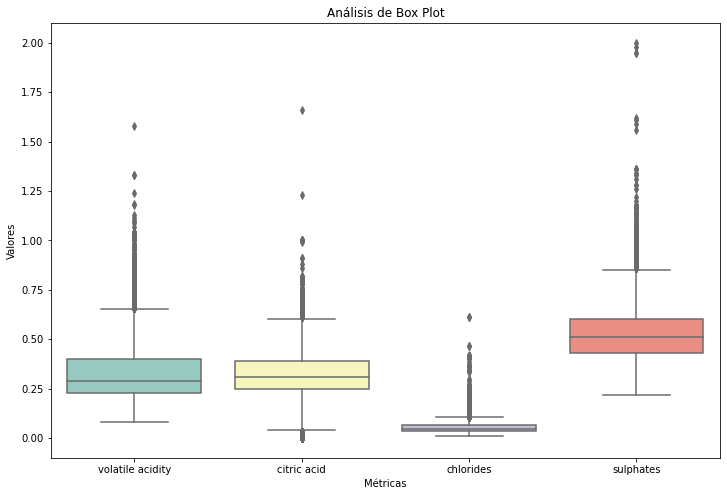

In [23]:
# Varias gráficas en una sola
# Fuente: https://www.python-graph-gallery.com/
plt.figure(figsize=(12,8))

summary = df.drop(['free sulfur dioxide', 'total sulfur dioxide', 'quality',
                   'residual sugar', 'fixed acidity', 'alcohol', 'pH', 'density'], axis=1)

sns.boxplot(data=summary, palette="Set3")

plt.title('Análisis de Box Plot')
plt.xlabel('Métricas')
plt.ylabel('Valores')

plt.show()

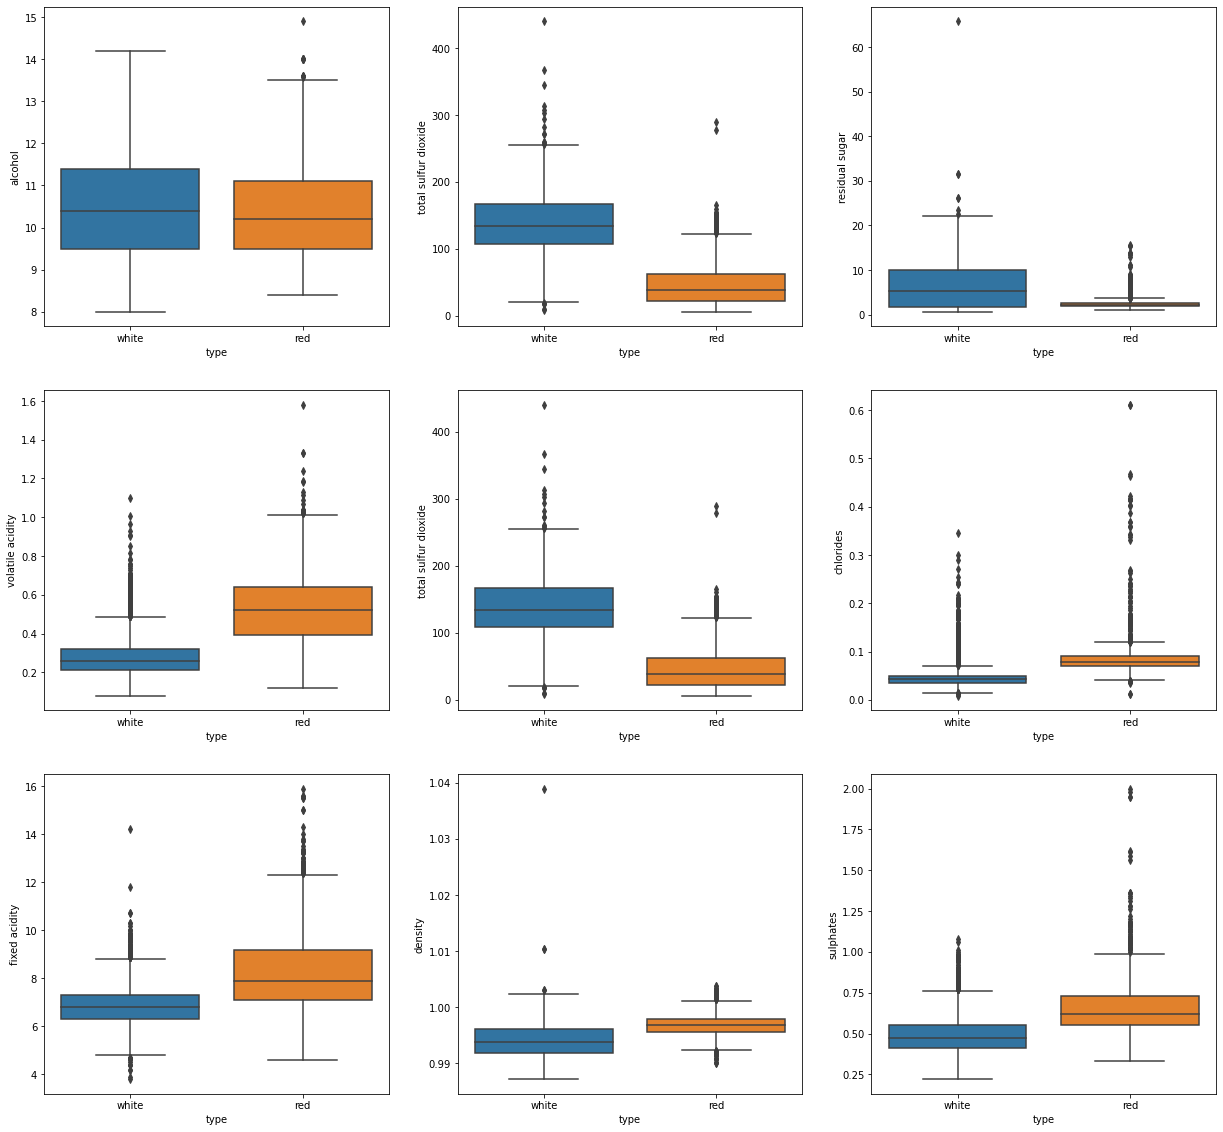

In [24]:
# Tamaño de las gráficas (x,y)
fig = plt.figure(figsize=(21,20))

# Variables a analizar
features = ["alcohol", "total sulfur dioxide", "residual sugar", "volatile acidity", 
            "total sulfur dioxide", "chlorides", "fixed acidity", "density","sulphates"]

# Loop para pasar el código por variable
for (i, feature) in enumerate(features):
    ax1 = fig.add_subplot(3,3,i+1)
    sns.boxplot(x="type", y=feature, data=df);

**Standard Deviation**

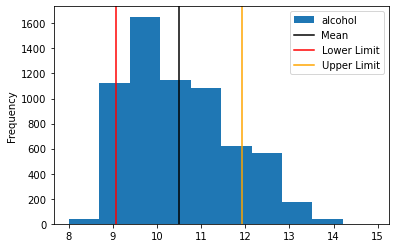

In [25]:
mean = df['alcohol'].mean()
variance = df['alcohol'].var()

df['alcohol'].plot.hist()

plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - variance, color = 'Red', label = 'Lower Limit')
plt.axvline(mean + variance, color = 'Orange', label = 'Upper Limit')

plt.legend()
plt.show()

**Correlation Matrix**

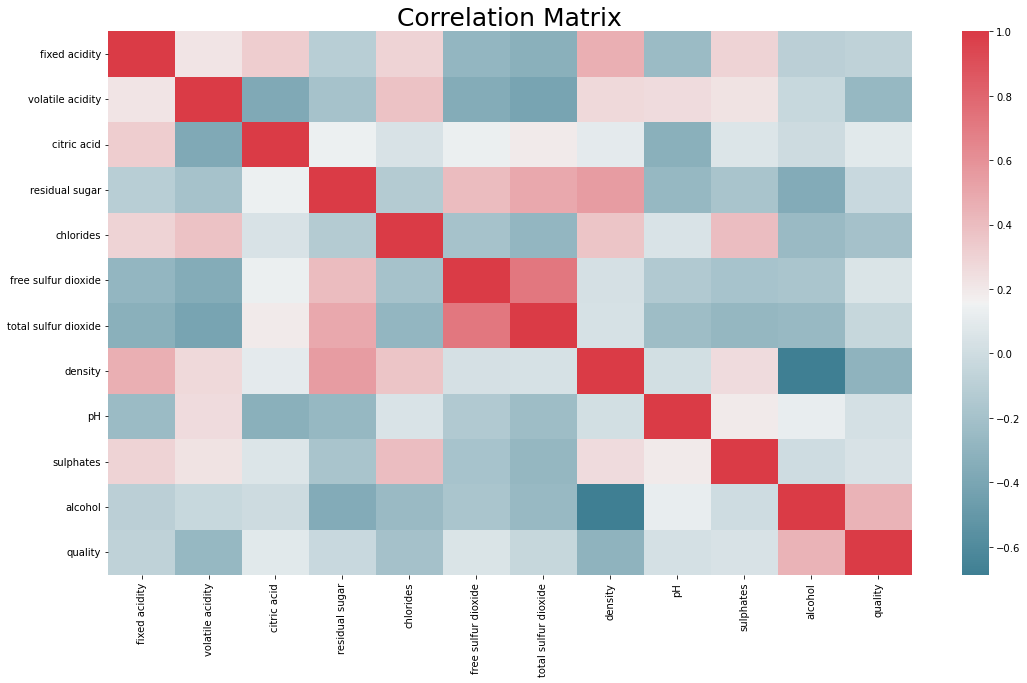

In [26]:
# Calculando correlaciones
corr = df.corr()
 
# Heatmap
plt.figure(figsize=(18, 10))

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.title('Correlation Matrix',fontsize=25)
plt.rcParams.update({'font.size': 15})

plt.show()

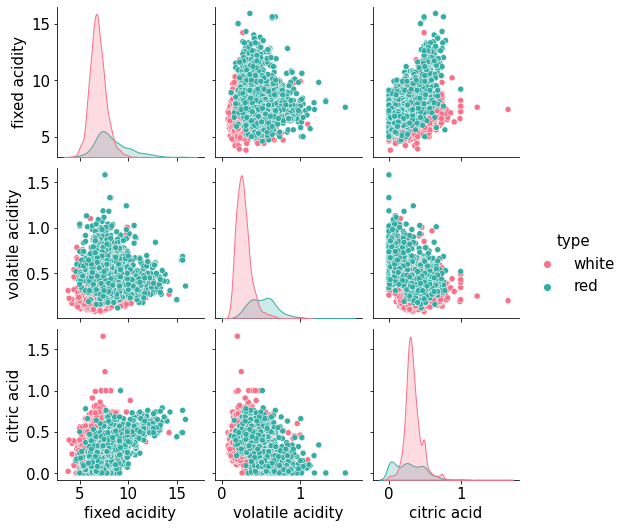

In [27]:
# Visualizaciones por tipos de vinos (seaborn)
g = sns.pairplot(df.iloc[:,:4], palette="husl", diag_kind="kde", hue='type')

### 2) Hypothesis Testing 🧪

* https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e
* https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e
* https://github.com/eceisik/eip/blob/main/hypothesis_testing_examples.ipynb  

In [57]:
# Instalando la librería
#!pip install scikit_posthocs

In [56]:
# Importando librerías
import scikit_posthocs as sp
from scipy import stats

In [53]:
pd.options.display.float_format = '{:,.4f}'.format

In [58]:
# Función para probar normalidad
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed") 

In [59]:
# Función para probar homogeneidad
# La homocedasticidad es una característica de un modelo de regresión lineal que
#implica que la varianza de los errores es constante a lo largo del tiempo.

def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

____________________________________________________________________________________

**Q1**

* Un profesor universitario dio conferencias en línea en lugar de clases presenciales. 
* Subió clases grabadas para los estudiantes que siguieron el curso de forma asincrónica.
* Son los mismo estudiantes, pero en diferentes momentos.
* **Hipótesis**: los estudiantes que asisten a clase en el horario de clase y participan en el proceso tienen mejores calificaciones.

In [60]:
sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
                 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])

asyncr =np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7,
                  72.6, 71.5, 78.2])

**Prueba de Normalidad**:
* H0: The data is normally distributed.
* H1: The data is not normally distributed.

Suponga que alfa = 0.05 Si el valor p es> 0.05, se puede decir que los datos se distribuyen normalmente.

In [63]:
check_normality(sync)
check_normality(asyncr)

p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


**Prueba de Homogeneidad**:
* H0: The variances of the samples are same.
* H1: The variances of the samples are different.

Prueba la hipótesis nula de que las varianzas de la población son iguales (llamada homogeneidad de varianza u homocedasticidad). 

Si el valor p resultante de la prueba de Levene es menor que algún nivel de significación (típicamente 0.05), es poco probable que las diferencias obtenidas en las varianzas de la muestra hayan ocurrido en base al muestreo aleatorio de una población con varianzas iguales.

In [64]:
check_variance_homogeneity(sync, asyncr)

p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.


**Prueba de Hipótesis**:

In [66]:
ttest,p_value = stats.ttest_ind(sync,asyncr)
print("p value:%.8f" % p_value)
print("Since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00753598
Since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


**Existe evidencia suficiente para concluir que la nota media de los alumnos que siguen la asignatura de forma sincrónica es superior a la de los asincrónicos.**

____________________________________________________________________________________

**Q2**

* Un pediatra quiere ver el efecto del consumo de fórmula en la ganancia de peso mensual promedio (en gramos) de los bebés.
* Recopiló datos de tres grupos diferentes: 
    - El 1° grupo son los niños amamantados exclusivamente (reciben solo leche materna)
    - El 2° grupo son los niños que se alimentan solo con fórmula
    - El 3° grupo son los niños amamantados y con fórmula.
* **Hipótesis**: Existe una diferencia en los resultados según el tipo de alimentación.

In [68]:
only_breast=np.array([794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7,
       717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1])

only_formula=np.array([ 898.8,  881.2,  940.2,  966.2,  957.5, 1061.7, 1046.2,  980.4,
        895.6,  919.7, 1074.1,  952.5,  796.3,  859.6,  871.1 , 1047.5,
        919.1 , 1160.5,  996.9])

both=np.array([976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6,
       805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 ,
       823.6, 818.7, 926.8, 791.7, 948.3])

**Prueba de Normalidad**:
* H0: The data is normally distributed.
* H1: The data is not normally distributed.

Suponga que alfa = 0.05 Si el valor p es> 0.05, se puede decir que los datos se distribuyen normalmente.

In [69]:
check_normality(only_breast)
check_normality(only_formula)
check_normality(both)

p value:0.4694
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8879
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7973
Fail to reject null hypothesis >> The data is normally distributed


**Prueba de Homogeneidad**:
* H0: m1=m2=m3
* H1: Al menos uno es diferente

In [73]:
stat, pvalue_levene= stats.levene(only_breast,only_formula,both)

print("p value:%.4f" % pvalue_levene)

if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.7673
Fail to reject null hypothesis >> The variances of the samples are same.


**Prueba de Hipótesis**:

In [74]:
F, p_value = stats.f_oneway(only_breast,only_formula,both)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


A este nivel de significación, se puede concluir que al menos uno de los grupos tiene una ganancia de peso promedio mensual diferente.

In [76]:
only_breast.mean(), only_formula.mean(), both.mean()

(749.8235294117648, 959.2157894736845, 809.9521739130436)

Si se prueban múltiples hipótesis, aumenta la probabilidad de observar un evento raro y, por lo tanto, aumenta la probabilidad de rechazar incorrectamente una hipótesis nula (es decir, cometer un error de tipo I).

In [79]:
posthoc_df= sp.posthoc_ttest([only_breast,only_formula,both], equal_var=True, p_adjust="bonferroni")

group_names= ["only breast", "only formula","both"]
posthoc_df.columns= group_names
posthoc_df.index= group_names

posthoc_df.style.applymap(lambda x: "background-color:lightgreen" if x<0.05 else "background-color: white")

,only breast,only formula,both
only breast,1.000000,0.000000,0.129454
only formula,0.000000,1.000000,0.000004
both,0.129454,0.000004,1.000000


____________________________________________________________________________________

**Q3**

* Un especialista en RH está interesado en el exceso de tiempo de trabajo de diferentes equipos.
* **Hipótesis**: Existe una diferencia entre las horas extra del equipo A y el equipo B.

In [81]:
test_team=np.array([6.2,  7.1,  1.5,  2,3 ,  2,  1.5,  6.1,  2.4,  2.3, 12.4,
                    1.8,  5.3,  3.1, 9.4,  2.3, 4.1])

developer_team=np.array([2.3,  2.1,  1.4,  2.0, 8.7,  2.2,  3.1,  4.2,  3.6,
                         2.5,  3.1,  6.2, 12.1,  3.9,  2.2, 1.2 ,3.4])

**Prueba de Normalidad**:
* H0: The data is normally distributed.
* H1: The data is not normally distributed.

Suponga que alfa = 0.05 Si el valor p es> 0.05, se puede decir que los datos se distribuyen normalmente.

In [83]:
check_normality(test_team)
check_normality(developer_team)

p value:0.0046
Reject null hypothesis >> The data is not normally distributed
p value:0.0005
Reject null hypothesis >> The data is not normally distributed


**Prueba de Homogeneidad**:
* H0: The variances of the samples are same.
* H1: The variances of the samples are different.

In [84]:
check_variance_homogeneity(test_team, developer_team)

p value:0.5410
Fail to reject null hypothesis >> The variances of the samples are same.


**Prueba de Hipótesis**:

In [87]:
ttest,pvalue = stats.mannwhitneyu(test_team,developer_team, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p-value:0.8226
Fail to reject null hypothesis


A este nivel de significancia, se puede decir que no existe una diferencia estadísticamente significativa entre el tiempo de exceso de trabajo promedio de los dos equipos.

____________________________________________________________________________________

**Q4**

* Una empresa de comercio electrónico anuncia regularmente sus campañas en YouTube, Instagram y Facebook. 
* **Hipótesis**: Hay diferencia entre la cantidad de clientes atraídos por estas plataformas.

In [88]:
youtube=np.array([1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956,
       2146, 2151, 1943, 2125])
       
instagram =  np.array([2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340.,
       2349., 2241., 2396., 2244., 2267., 2281.])
       
facebook = np.array([2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178.,
       2113., 2048., 2443., 2265., 2095., 2528.]) 

**Prueba de Normalidad**:
* H0: The data is normally distributed.
* H1: The data is not normally distributed.

Suponga que alfa = 0.05 Si el valor p es> 0.05, se puede decir que los datos se distribuyen normalmente.

In [90]:
check_normality(youtube)
check_normality(instagram)
check_normality(facebook)

p value:0.0285
Reject null hypothesis >> The data is not normally distributed
p value:0.4156
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1716
Fail to reject null hypothesis >> The data is normally distributed


**Prueba de Homogeneidad**:
* H0: The variances of the samples are same.
* H1: The variances of the samples are different.

In [91]:
stat, pvalue_levene= stats.levene(youtube, instagram, facebook)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0012
Reject null hypothesis >> The variances of the samples are different.


**Prueba de Hipótesis**:

In [92]:
F, p_value = stats.kruskal(youtube, instagram, facebook)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000015
Reject null hypothesis


In [93]:
youtube.mean(), instagram.mean(), facebook.mean()

(2043.5333333333333, 2307.5333333333333, 2295.4)

In [95]:
posthoc_df = sp.posthoc_mannwhitney([youtube,instagram, facebook], p_adjust = 'bonferroni')
group_names= ["youtube", "instagram","facebook"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:lightgreen" if x<0.05 else "background-color: white")

,youtube,instagram,facebook
youtube,1.000000,0.000010,0.002337
instagram,0.000010,1.000000,1.000000
facebook,0.002337,1.000000,1.000000


El número promedio de clientes que provienen de YouTube es diferente al de los demás (en realidad, más pequeño que los demás).

____________________________________________________________________________________

**Q5**

* Un Centro de Salud diagnosticó a 18 estudiantes con colesterol alto en el semestre anterior. En consecuencia, se les prescribió un programa de dieta.
* Un mes después, los pacientes acudieron para control y se volvió a examinar su nivel de colesterol. 
* **Hipótesis**: La dieta trajo mejoras en el nivel de colesterol.

In [97]:
test_results_before_diet=np.array([224, 235, 223, 253, 253, 224, 244, 225, 259, 220, 242, 240, 239, 229, 276, 254, 237, 227])
test_results_after_diet=np.array([198, 195, 213, 190, 246, 206, 225, 199, 214, 210, 188, 205, 200, 220, 190, 199, 191, 218])

**Prueba de Normalidad**:
* H0: The data is normally distributed.
* H1: The data is not normally distributed.

Suponga que alfa = 0.05 Si el valor p es> 0.05, se puede decir que los datos se distribuyen normalmente.

In [98]:
check_normality(test_results_before_diet)
check_normality(test_results_after_diet)

p value:0.1635
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1003
Fail to reject null hypothesis >> The data is normally distributed


**Prueba de Homogeneidad**:
* H0: The variances of the samples are same.
* H1: The variances of the samples are different.

In [99]:
test_stat, p_value_paired = stats.ttest_rel(test_results_before_diet,test_results_after_diet)
print("p value:%.6f" % p_value_paired , "one tailed p value:%.6f" %(p_value_paired/2))
if p_value_paired <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000008 one tailed p value:0.000004
Reject null hypothesis


En este nivel de significación, hay evidencia suficiente para concluir que el nivel medio de colesterol de los pacientes ha disminuido después de la dieta.

____________________________________________________________________________________

**Q6**

* Un capitalista de riesgo quería invertir en una startup que proporciona compresión de datos sin pérdida de calidad, pero hay dos competidores: PiedPiper y EndFrame.
* Inicialmente, creía que el rendimiento de EndFrame podría ser mejor, pero aun así quería probarlo antes de la inversión.
* **Hipótesis**: Existen diferencias en la calidad entregada entre los competidores.

In [100]:
piedpiper=np.array([4.57, 4.55, 5.47, 4.67, 5.41, 5.55, 5.53, 5.63, 3.86, 3.97, 5.44, 3.93, 5.31, 5.17, 4.39, 4.28, 5.25])
endframe = np.array([4.27, 3.93, 4.01, 4.07, 3.87, 4.  , 4.  , 3.72, 4.16, 4.1 , 3.9 , 3.97, 4.08, 3.96, 3.96, 3.77, 4.09])

**Prueba de Normalidad**:
* H0: The data is normally distributed.
* H1: The data is not normally distributed.

Suponga que alfa = 0.05 Si el valor p es> 0.05, se puede decir que los datos se distribuyen normalmente.

In [101]:
check_normality(piedpiper)
check_normality(endframe)

p value:0.0304
Reject null hypothesis >> The data is not normally distributed
p value:0.9587
Fail to reject null hypothesis >> The data is normally distributed


**Prueba de Homogeneidad**:
* H0: The variances of the samples are same.
* H1: The variances of the samples are different.

In [109]:
stat, pvalue_levene= stats.levene(piedpiper, endframe)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0001
Reject null hypothesis >> The variances of the samples are different.


**Prueba de Hipótesis**:

In [102]:
test,pvalue = stats.wilcoxon(endframe,piedpiper) ##alternative default two sided
print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))

test,one_sided_pvalue = stats.wilcoxon(endframe,piedpiper, alternative="less")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value:0.000214 >> one_tailed_pval:0.000107
one sided pvalue:0.000107
Reject null hypothesis


In [103]:
piedpiper.mean(), endframe.mean()

(4.881176470588235, 3.991764705882353)

En este nivel de significación, hay suficiente evidencia para concluir que el desempeño de PiedPaper es mejor que el de EndFrame.

____________________________________________________________________________________

**Q7**

* Una investigadora tenía curiosidad acerca de si existe una diferencia entre la metodología que desarrolló (C), y los métodos de referencia (A y B).
* Diseñó diferentes experimentos y registró la precisión alcanzada por cada método. 
* Se utilizaron los mismos conjuntos de prueba y para cada método.
* **Hipótesis**: Hay diferencias entre los métodos.

In [104]:
method_A = np.array([89.8, 89.9, 88.6, 88.7, 89.6, 89.7, 89.2, 89.3])
method_B =   np.array([90.0, 90.1, 88.8, 88.9, 89.9, 90.0, 89.0, 89.2])
method_C = np.array([91.5, 90.7, 90.3, 90.4, 90.2, 90.3, 90.2, 90.3])

**Prueba de Normalidad**:
* H0: The data is normally distributed.
* H1: The data is not normally distributed.

Suponga que alfa = 0.05 Si el valor p es> 0.05, se puede decir que los datos se distribuyen normalmente.

In [105]:
check_normality(method_A)
check_normality(method_B)
check_normality(method_C)

p value:0.3076
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0515
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0016
Reject null hypothesis >> The data is not normally distributed


**Prueba de Homogeneidad**:
* H0: The variances of the samples are same.
* H1: The variances of the samples are different.

In [106]:
stat, pvalue_levene= stats.levene(method_A, method_B, method_C)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.1953
Fail to reject null hypothesis >> The variances of the samples are same.


**Prueba de Hipótesis**:

In [111]:
test_stat,p_value = stats.friedmanchisquare(method_A,method_B, method_C)
print("p value:%.4f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.0015
Reject null hypothesis


In [113]:
method_A.mean(), method_B.mean(), method_C.mean()

(89.35, 89.4875, 90.4875)

In [116]:
data = np.array([method_A, method_B, method_C]) 
posthoc_df=sp.posthoc_wilcoxon(data, p_adjust="holm")
# posthoc_df = sp.posthoc_nemenyi_friedman(data.T) ## another option for the posthoc test

group_names= ["Method A", "Method B","Method C"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:lightgreen" if x<0.05 else "background-color: white")

,Method A,Method B,Method C
Method A,1.000000,0.078125,0.023438
Method B,0.078125,1.000000,0.023438
Method C,0.023438,0.023438,1.000000


El método C superó a los demás y logró mejores puntajes de precisión que los demás.

____________________________________________________________________________________

**Q8**

* Un analista de una empresa de inversión financiera siente curiosidad por la relación entre el género y el apetito por el riesgo. 
* Se tomó una muestra aleatoria de 660 clientes de la base de datos. 
* **Hipótesis**: Existen diferencias entre género en relación a l apetito por el riesgo.

In [123]:
pd.DataFrame({'Gender/Risk Appetite': ['Female','Male','Total'],
              'Very Low': [53,71,124],
              'Low': [23,48,71],
              'Medium': [30,51,81],
              'High': [36,57,93],
              'Very High': [88,203,291],
              'Total': [230,430,660]
             }).set_index(keys='Gender/Risk Appetite')

,Very Low,Low,Medium,High,Very High,Total
Gender/Risk Appetite,,,,,,
Female,53,23,30,36,88,230
Male,71,48,51,57,203,430
Total,124,71,81,93,291,660


**Chi2 Test**:
* Esta prueba se conoce como la prueba de bondad de ajuste. 
* Implica que si los datos observados están muy cerca de los datos esperados. El supuesto de esta prueba cada Ei ≥ 5 (en al menos el 80% de las celdas) que se cumple.

In [124]:
from scipy.stats import chi2_contingency

obs =np.array([[53, 23, 30, 36, 88],[71, 48, 51, 57, 203]])
chi2, p, dof, ex = chi2_contingency(obs, correction=False)

print("expected frequencies:\n ", np.round(ex,2))
print("degrees of freedom:", dof)
print("test stat :%.4f" % chi2)
print("p value:%.4f" % p)

expected frequencies:
  [[ 43.21  24.74  28.23  32.41 101.41]
 [ 80.79  46.26  52.77  60.59 189.59]]
degrees of freedom: 4
test stat :7.0942
p value:0.1310


In [126]:
from scipy.stats import chi2
## calculate critical stat

alpha = 0.05
df = (5-1)*(2-1)
critical_stat = chi2.ppf((1-alpha), df)
print("critical stat:%.4f" % critical_stat)

critical stat:9.4877


Dado que el valor p es mayor que α=0.01 (o la estadística calculada=9.58 es menor que la estadística crítica=13.28), No se puede rechazar H0. A este nivel de significación, se puede concluir que el género y el apetito por el riesgo son independientes.